In [44]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Part - 2


### 2.1(a) Mean-reverting change - using optimistic greedy method 

In [45]:
def mean_reverting_optimistic_greedy(steps, bandit_problems, n_actions, testbed, global_reward_list, global_optimal_action_list):
    action_count = np.zeros((bandit_problems, n_actions))
    reward_estimates = np.ones((bandit_problems, n_actions)) * 5  # initial optimistic reward estimates 
    avg_rewards_per_step = []
    optimal_action_count = np.zeros(steps)
    terminal_rewards = np.zeros(bandit_problems)  # Initialize terminal rewards array

    for step in range(steps):
        reward_sum_over_all_bandits_per_step = 0
        optimal_action_chosen_count = 0

        for problem_index in range(bandit_problems):
            maxval = np.amax(reward_estimates[problem_index])  # Find the maximum value of the reward for that problem.
            maxval_indices = np.ravel(np.where(reward_estimates[problem_index] == maxval))  # Get the index of that reward in the problem
            random_choice = np.random.choice(maxval_indices)  # Randomly select one index from the list of indices with the highest estimated reward.

            # Generate reward
            Rn = np.random.normal(testbed[problem_index][random_choice], 1)
            action_count[problem_index][random_choice] += 1
            n = action_count[problem_index][random_choice]

            # Update reward estimate
            reward_estimates[problem_index][random_choice] = reward_estimates[problem_index][random_choice] + (Rn - reward_estimates[problem_index][random_choice]) / n

            reward_sum_over_all_bandits_per_step += Rn

            # Store terminal rewards
            if step == steps - 1:
                terminal_rewards[problem_index] = Rn

            # Check if the optimal action was chosen
            optimal_action = np.argmax(testbed[problem_index])
            if random_choice == optimal_action:
                optimal_action_chosen_count += 1
                
        #Apply mean-reverting change        
        testbed = 0.5*testbed + np.random.normal(0, 0.001, testbed.shape)  
        #Add the average reward in each step to the array
        avg_rewards_per_step.append(reward_sum_over_all_bandits_per_step / bandit_problems)
        optimal_action_count[step] = optimal_action_chosen_count / bandit_problems

    global_reward_list.append(avg_rewards_per_step)
    global_optimal_action_list.append(optimal_action_count)
    return terminal_rewards


### 2.2(b) Mean-reverting change - using epsilon-greedy with fixed step_size

In [46]:
def mean_reverting_epsilon_fixed_step(steps, bandit_problems, n_actions, testbed, epsilon):
    action_count = np.ones((bandit_problems, n_actions))
    reward_estimates = np.zeros((bandit_problems, n_actions))  # initial reward estimates set to zero
    avg_rewards_per_step = []
    optimal_action_count = np.zeros(steps)
    terminal_rewards = np.zeros(bandit_problems)  # Initialize terminal rewards array
    step_size = 0.1 #fixed step_size 

    for step in range(steps):
        reward_sum_over_all_bandits_per_step = 0
        optimal_action_chosen_count = 0

        for problem_index in range(bandit_problems):
            #Genarte a random number
            var_random = random.random()
            # Choose Greedy action if the random value is bigger than epsilon
            if var_random > epsilon:
                maxval = np.amax(reward_estimates[problem_index])  # Find the maximum value of the reward for that problem
                maxval_indices = np.ravel(np.where(reward_estimates[problem_index] == maxval))  # Get the index of that reward in the problem
                random_choice = np.random.choice(maxval_indices)  # Randomly select one index from the list of indices with the highest estimated reward
            # Choose a random action from all the actions    
            else:
                random_choice = np.random.randint(n_actions)

            # Generate reward from the testbed
            Rn = np.random.normal(testbed[problem_index][random_choice], 1)
            action_count[problem_index][random_choice] += 1
            n = action_count[problem_index][random_choice]

            # Update reward estimate
            reward_estimates[problem_index][random_choice] = reward_estimates[problem_index][random_choice] + step_size * (Rn - reward_estimates[problem_index][random_choice]) 

            reward_sum_over_all_bandits_per_step += Rn

            # Store terminal rewards
            if step == steps - 1:
                terminal_rewards[problem_index] = Rn

            # Check if the optimal action was taken
            optimal_action = np.argmax(testbed[problem_index])
            if random_choice == optimal_action:
                optimal_action_chosen_count += 1

        #Apply mean-reverting change
        testbed = 0.5*testbed + np.random.normal(0, 0.001, testbed.shape)  
        #Add the average reward in each step to the array
        avg_rewards_per_step.append(reward_sum_over_all_bandits_per_step / bandit_problems)
        optimal_action_count[step] = optimal_action_chosen_count / bandit_problems

    return avg_rewards_per_step, optimal_action_count, terminal_rewards



### 2.3(c) Mean-reverting change - using epsilon-greedy with a decreasing step_size

In [47]:
def mean_reverting_epsilon_decreasing_step(steps, bandit_problems, n_actions, testbed, epsilon):
    action_count = np.ones((bandit_problems, n_actions))
    reward_estimates = np.zeros((bandit_problems, n_actions))  # initial reward estimates set to zero
    avg_rewards_per_step = []
    optimal_action_count = np.zeros(steps)
    terminal_rewards = np.zeros(bandit_problems)  # Initialize terminal rewards array

    for step in range(steps):
        reward_sum_over_all_bandits_per_step = 0
        optimal_action_chosen_count = 0
        

        for problem_index in range(bandit_problems):
            var_random = random.random()
            if var_random > epsilon:
                maxval = np.amax(reward_estimates[problem_index])  # Find the maximum value of the reward for that problem.
                maxval_indices = np.ravel(np.where(reward_estimates[problem_index] == maxval))  # Get the index of that reward in the problem
                random_choice = np.random.choice(maxval_indices)  # Randomly select one index from the list of indices with the highest estimated reward.
            else:
                random_choice = np.random.randint(n_actions)

            # Generate reward from the testbed
            Rn = np.random.normal(testbed[problem_index][random_choice], 1)
            action_count[problem_index][random_choice] += 1
            n = action_count[problem_index][random_choice]
            
            #Decrease the stepsize 
            step_size = 1/n 

            # Update reward estimate
            reward_estimates[problem_index][random_choice] = reward_estimates[problem_index][random_choice] + step_size * (Rn - reward_estimates[problem_index][random_choice]) / n

            reward_sum_over_all_bandits_per_step += Rn

            # Store terminal rewards
            if step == steps - 1:
                terminal_rewards[problem_index] = Rn

            # Check if the optimal action was taken
            optimal_action = np.argmax(testbed[problem_index])
            if random_choice == optimal_action:
                optimal_action_chosen_count += 1
                
        #Apply mean-reverting change
        testbed = 0.5*testbed + np.random.normal(0, 0.001, testbed.shape)
        #Add the average reward in each step to the array
        avg_rewards_per_step.append(reward_sum_over_all_bandits_per_step / bandit_problems)
        optimal_action_count[step] = optimal_action_chosen_count / bandit_problems

    return avg_rewards_per_step, optimal_action_count, terminal_rewards



### Visualization mean-reverting change using box-plot

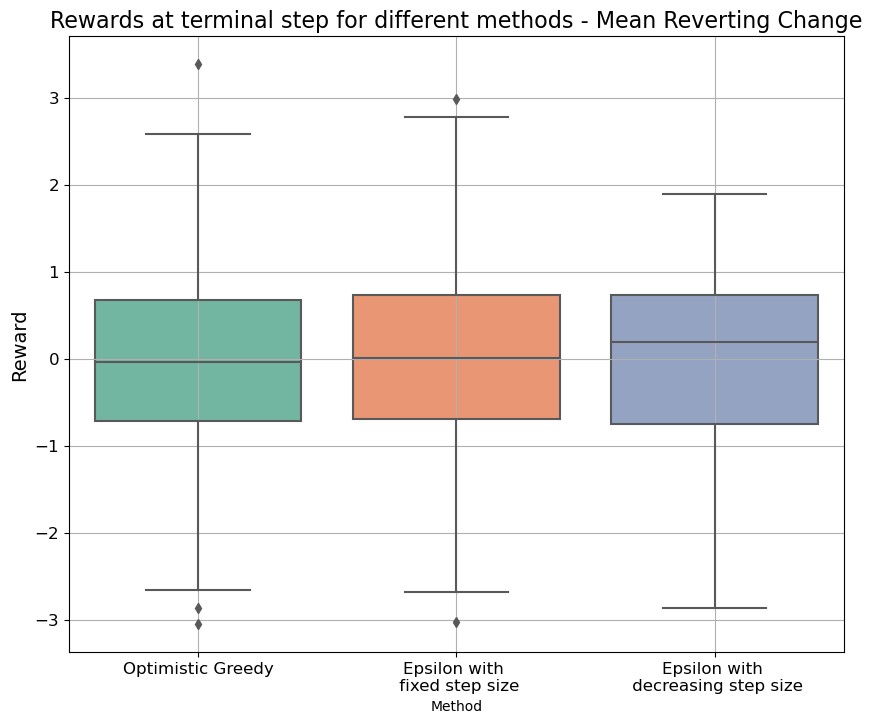

In [48]:
steps = 10000
bandit_problems = 1000
n_actions = 10
# Testbed: 1000 sets of ten mean parameters
testbed = np.random.normal(0, 1, (bandit_problems, n_actions))
global_reward_list = []
global_optimal_action_list = []


terminal_greedy=mean_reverting_optimistic_greedy(steps, bandit_problems, n_actions, testbed, global_reward_list, global_optimal_action_list)
# Average reward at each time step
average_reward_across_runs = np.mean(global_reward_list, axis=0)
# Percentage of time the optimal action is taken
optimal_action_percentage = np.mean(global_optimal_action_list, axis=0) * 100

epsilon = 0.1
# Testbed: 1000 sets of ten mean parameters
testbed = np.random.normal(0, 1, (bandit_problems, n_actions))
# calling the function for fixed step epsilon greedt
avg_rewards_per_step, optimal_action_count, terminal_rewards_fixed = mean_reverting_epsilon_fixed_step(steps, bandit_problems, n_actions, testbed, epsilon)
average_reward_across_runs = np.mean([avg_rewards_per_step], axis=0)
avg_rewards_fixed_epsilon = average_reward_across_runs # for box plot

optimal_action_percentage = np.mean([optimal_action_count], axis=0) * 100

# Testbed: 1000 sets of ten mean parameters
testbed = np.random.normal(0, 1, (bandit_problems, n_actions))

all_avg_rewards = [terminal_greedy, terminal_rewards_fixed, terminal_rewards_decreasing]

methods = ['Optimistic Greedy', 'Epsilon with \n fixed step size', 'Epsilon with \n decreasing step size']
data = []

for i, method in enumerate(methods):
    for reward in all_avg_rewards[i]:
        data.append((method, reward))

df = pd.DataFrame(data, columns=['Method', 'Reward'])

plt.figure(figsize=(10, 8))
sns.boxplot(x='Method', y='Reward', data=df, palette='Set2')

# Customizations
plt.title('Rewards at terminal step for different methods - Mean Reverting Change', fontsize=16)
# plt.xlabel('Methods', fontsize=14)
plt.ylabel('Reward', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

plt.show()

In [49]:
mean_reverting_avg_performance = df.groupby('Method').mean()
mean_reverting_avg_performance

,Reward
Method,
Epsilon with \n decreasing step size,0.017360
Epsilon with \n fixed step size,0.014586
Optimistic Greedy,-0.021509
